<a href="https://colab.research.google.com/github/PattarapornH/Crab-Molting-Detection/blob/master/Molting_crab_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
path_dir = 'gdrive/My Drive/Year4/Project/top_view/Case10_2018_09_29_Coor(5_2)/'

path = []

for p in os.listdir(path_dir):
  # print(p)
  path.append(p)

path.sort()
path[0:10]

['21-20-05.png',
 '21-20-15.png',
 '21-20-25.png',
 '21-20-35.png',
 '21-20-45.png',
 '21-20-55.png',
 '21-21-05.png',
 '21-21-15.png',
 '21-21-25.png',
 '21-21-35.png']

In [0]:
from google.colab.patches import cv2_imshow

def plot_img(image):
  cv2_imshow(image)

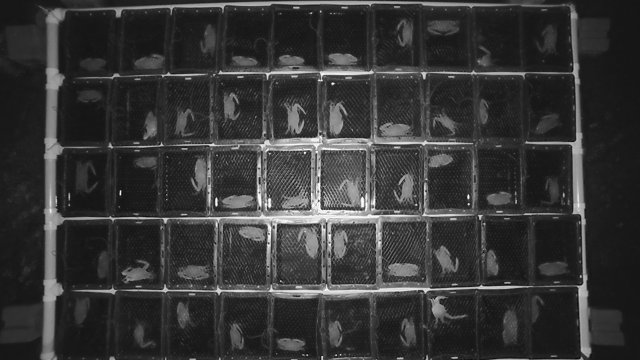

In [55]:
import cv2 as cv

data = []

for p in path:
  img = cv.imread(path_dir+'/'+p)
  shape = img.shape
  img_resize = cv.resize(img,(int(shape[1]/2),int(shape[0]/2)))
  data.append(img_resize)

plot_img(data[0])
# data[0].shape

In [56]:
clean_data = []
for i in range(len(data)):
  print('.',end='')
  img = cv.fastNlMeansDenoisingColored(data[i],None,10,10,7,21)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  blur = cv.medianBlur(gray, 5)
  _, th1 = cv.threshold(blur,180, 230,cv.THRESH_BINARY)
  dst = cv.inpaint(blur,th1,11,cv.INPAINT_TELEA)
  clean_data.append(dst)


.............................................................

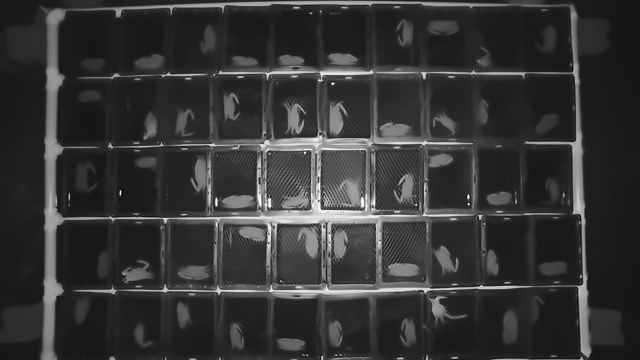

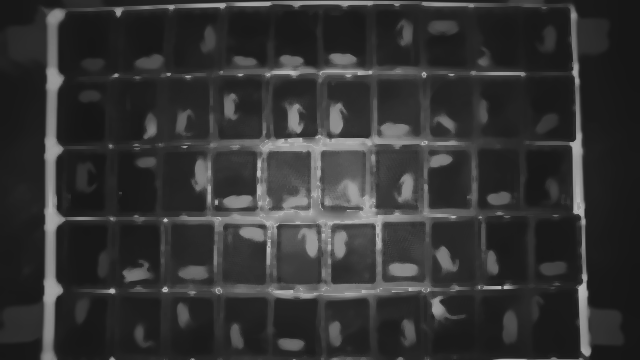

In [57]:
img = cv.fastNlMeansDenoisingColored(data[0],None,10,10,7,21)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.medianBlur(gray, 5)
_, th1 = cv.threshold(blur,180, 230,cv.THRESH_BINARY)
dst = cv.inpaint(blur,th1,11,cv.INPAINT_TELEA)
plot_img(img)
print()
plot_img(dst)

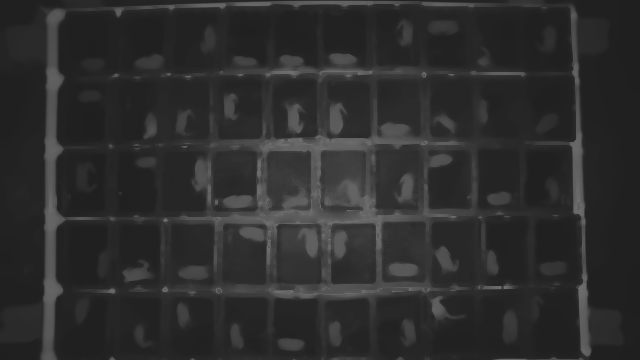

In [0]:
# contrast
alpha = 0.5
beta = 20
new_image = cv.convertScaleAbs(dst, alpha=alpha, beta=beta)
plot_img(new_image)

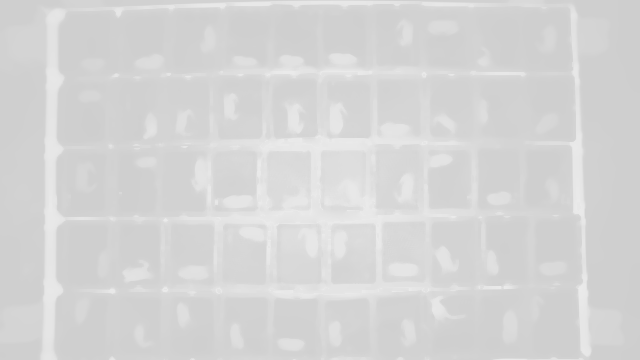

In [0]:
# gamma correction
gamma = 0.1
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
  lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(new_image, lookUpTable)
plot_img(res)

max 252
avg 70.40567708333333
sd 54.103255438288784
min 22


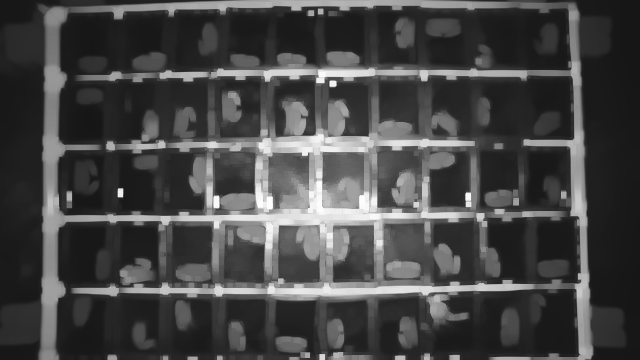

In [80]:
img = cv.fastNlMeansDenoisingColored(data[0],None,10,10,7,21)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# blur = cv.medianBlur(gray, 5)
# dst = cv.inpaint(blur,th1,11,cv.INPAINT_TELEA)

kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(gray,kernel,iterations=1)
# e = cv.dilate(dilation,kernel,iterations=2)
print('max',np.max(dilation))
print('avg',np.mean(dilation))
print('sd',np.std(dilation))
print('min',np.min(dilation))
plot_img(dilation)

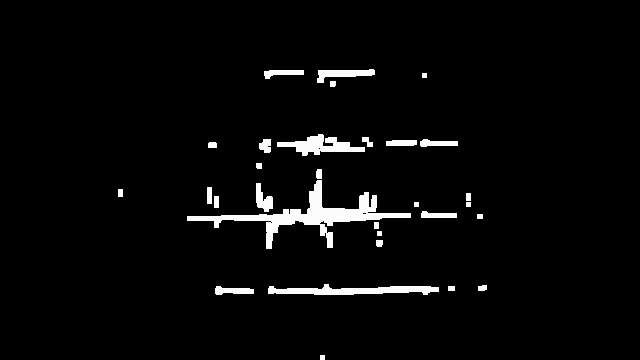

In [91]:
_, th1 = cv.threshold(dilation, np.mean(dilation)+2.5*np.std(dilation), np.max(dilation),cv.THRESH_BINARY)
plot_img(th1)

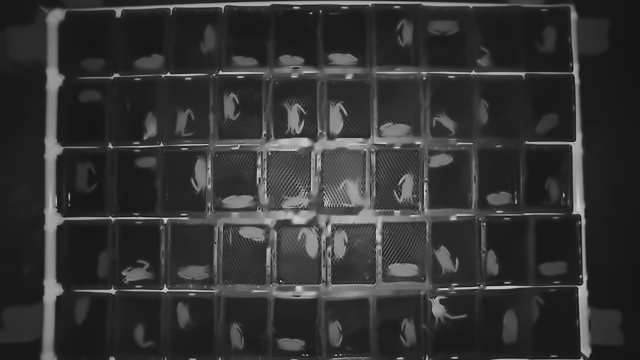

In [92]:
dst = cv.inpaint(gray,th1,3,cv.INPAINT_NS)
plot_img(dst)

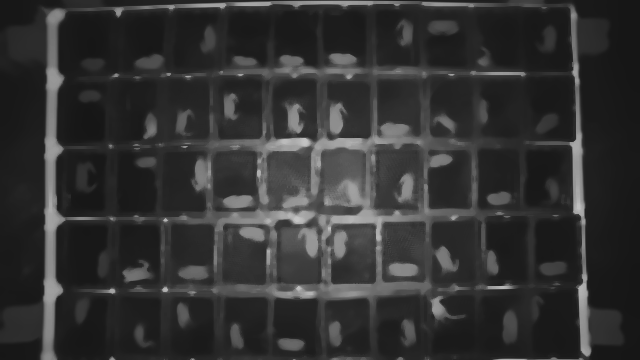

In [93]:
blur = cv.medianBlur(dst, 5)
plot_img(blur)